# Covid Data Analysis of year from 2020 to 2022

This dataset consists of covid records like total cases,total deaths,vaccinations etc of 216 different countries from year 
2020 to 2022. The dataset consists data on the  daily basis. 

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="covid_data_analysis")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ms6050325/covid-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ms6050325/covid-data-analysis


'https://jovian.ai/ms6050325/covid-data-analysis'

In [5]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set_style('darkgrid') #set graph style
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(14,6)

In [6]:
#reading dataset from csv file format using read_csv method of pandas.
covid_df = pd.read_csv("covid_cases__vaccination.csv",index_col=0)
covid_df.head()

,country,date,total_cases,total_deaths,daily_cases,daily_deaths,fully_vaccinated,total_vaccinations,total_boosters,daily_vaccinations,daily_people_vaccinated
0,afghanistan,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,afghanistan,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,afghanistan,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,afghanistan,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,afghanistan,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199017 entries, 0 to 199016
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   country                  199017 non-null  object 
 1   date                     199017 non-null  object 
 2   total_cases              199017 non-null  float64
 3   total_deaths             199017 non-null  float64
 4   daily_cases              199017 non-null  float64
 5   daily_deaths             199017 non-null  float64
 6   fully_vaccinated         199017 non-null  float64
 7   total_vaccinations       199017 non-null  float64
 8   total_boosters           199017 non-null  float64
 9   daily_vaccinations       199017 non-null  float64
 10  daily_people_vaccinated  199017 non-null  float64
dtypes: float64(9), object(2)
memory usage: 18.2+ MB


In [8]:
#changing date to datetime format
covid_df["date"] = pd.to_datetime(covid_df.date)

In [9]:
#Changing country name to proper case for better readability
covid_df.country = covid_df.country.str.capitalize() 

In [10]:
covid_df.country.nunique()

216

There are total 216 countries data in this dataset.

In [11]:
covid_df.describe()
#It is clearly observe that some of the entries in the dataset is incorrect like dailycases and daily_deaths are negative.
# So cleaning the dataset for better analysis is needed 

,total_cases,total_deaths,daily_cases,daily_deaths,fully_vaccinated,total_vaccinations,total_boosters,daily_vaccinations,daily_people_vaccinated
count,1.990170e+05,1.990170e+05,1.990170e+05,199017.000000,1.990170e+05,1.990170e+05,1.990170e+05,1.990170e+05,1.990170e+05
mean,9.536675e+05,1.567214e+04,3.246969e+03,33.998769,4.208478e+06,1.713372e+07,9.571097e+05,6.200001e+04,2.361119e+04
std,4.225319e+06,6.290801e+04,1.892379e+04,171.530630,3.527499e+07,1.395658e+08,9.663093e+06,5.135084e+05,1.915358e+05
min,0.000000e+00,0.000000e+00,-3.491160e+05,-1918.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434000e+03,1.900000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.779800e+04,3.840000e+02,4.100000e+01,0.000000,0.000000e+00,1.518200e+04,0.000000e+00,4.300000e+01,6.000000e+00
75%,2.904140e+05,4.636000e+03,6.580000e+02,7.000000,0.000000e+00,1.938564e+06,0.000000e+00,7.858000e+03,2.663000e+03
max,8.859459e+07,1.020862e+06,1.383890e+06,11447.000000,1.261908e+09,3.405602e+09,7.932790e+08,2.242429e+07,6.785334e+06


#### Clearing some invalid values like negative daily_cases and daily_deaths

In [12]:
Invalid_cases= covid_df[covid_df['daily_cases']<0].index 

In [13]:
covid_df.drop(Invalid_cases,inplace=True)

In [14]:
invalid_deaths=covid_df[covid_df.daily_deaths<0].index

In [15]:
covid_df.drop(invalid_deaths,inplace=True)

In [16]:
covid_df.head()

,country,date,total_cases,total_deaths,daily_cases,daily_deaths,fully_vaccinated,total_vaccinations,total_boosters,daily_vaccinations,daily_people_vaccinated
0,Afghanistan,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Adding new column of month and Year

In [17]:
covid_df["Month"] = covid_df.date.dt.month_name()

In [18]:
covid_df['Year'] = covid_df.date.dt.year

In [19]:
covid_df.head()

,country,date,total_cases,total_deaths,daily_cases,daily_deaths,fully_vaccinated,total_vaccinations,total_boosters,daily_vaccinations,daily_people_vaccinated,Month,Year
0,Afghanistan,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,January,2020
1,Afghanistan,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,January,2020
2,Afghanistan,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,January,2020
3,Afghanistan,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,January,2020
4,Afghanistan,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,January,2020


## Q.Countries with most number of cases(top 10)

In [20]:
top = covid_df.groupby("country")["total_cases"].sum().sort_values(ascending=False)


In [21]:
top_10 = top[0:10].to_frame()

In [22]:
top_10.head()

,total_cases
country,
United states,2.995879e+10
United kingdom,2.952313e+10
India,1.835522e+10
Brazil,1.258089e+10
France,6.784031e+09


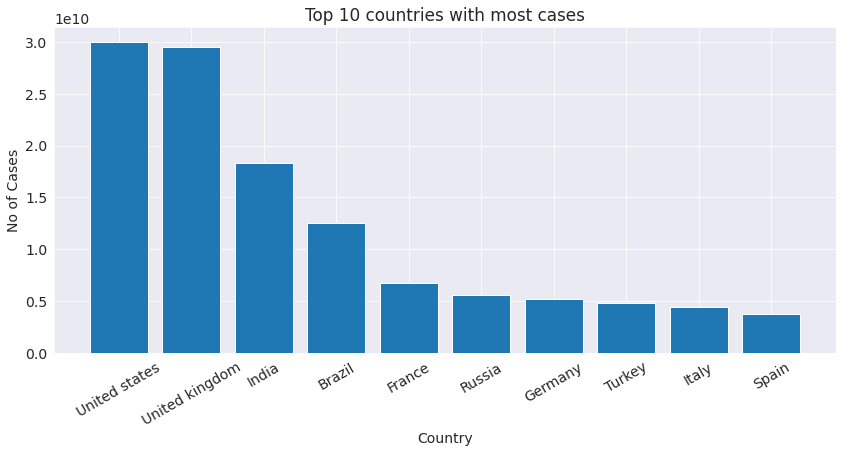

In [23]:
plt.title("Top 10 countries with most cases")
plt.xlabel("Country")
plt.xticks(rotation=30)
plt.ylabel("No of Cases")
plt.bar(top_10.index,top_10.total_cases)
plt.show()

## Q.Countries with 0 number of total cases.

In [24]:
top = top.to_frame()

In [25]:
Zero_cases = top[top.total_cases == 0]

In [26]:
Zero_cases

,total_cases
country,
Niue,0.0
Northern cyprus,0.0
Tuvalu,0.0
Cape verde,0.0
Oceania,0.0
Turkmenistan,0.0


## Q.Country with highest number of fully vaccinated citizens.

In [27]:
vaccinated = covid_df.groupby("country")["fully_vaccinated"].sum().sort_values(ascending=False)

In [28]:
vaccinated

country
India             2.016398e+11
United states     8.832071e+10
China             5.542311e+10
Brazil            4.434686e+10
United kingdom    3.743412e+10
                      ...     
New caledonia     0.000000e+00
Isle of man       0.000000e+00
Eritrea           0.000000e+00
Micronesia        0.000000e+00
Palau             0.000000e+00
Name: fully_vaccinated, Length: 216, dtype: float64

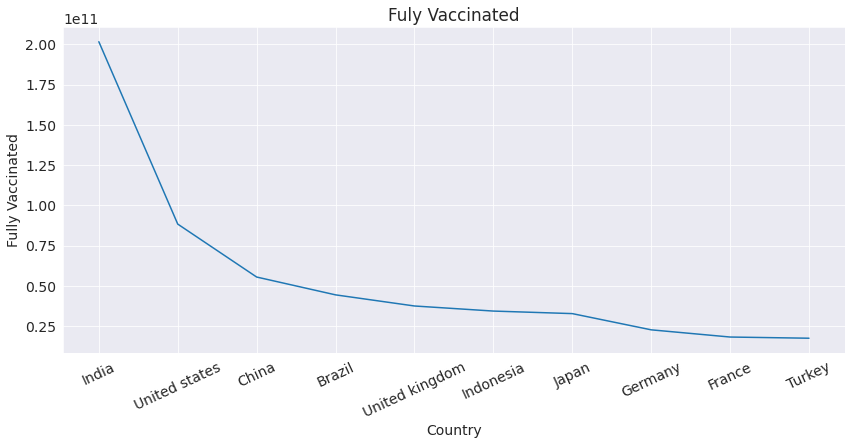

In [29]:
plt.title('Fuly Vaccinated')
plt.plot(vaccinated[0:10])
plt.xlabel('Country')
plt.xticks(rotation=25)
plt.ylabel('Fully Vaccinated')
plt.show()

# India

In [30]:
India_records = covid_df[covid_df.country=="India"]

In [31]:
India_records.head()

,country,date,total_cases,total_deaths,daily_cases,daily_deaths,fully_vaccinated,total_vaccinations,total_boosters,daily_vaccinations,daily_people_vaccinated,Month,Year
84579,India,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,January,2020
84580,India,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,January,2020
84581,India,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,January,2020
84582,India,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,January,2020
84583,India,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,January,2020


In [32]:
year_wise = India_records.groupby("Year").sum()

In [33]:
year_wise

,total_cases,total_deaths,daily_cases,daily_deaths,fully_vaccinated,total_vaccinations,total_boosters,daily_vaccinations,daily_people_vaccinated
Year,,,,,,,,,
2020,1.084280e+09,17171594.0,10286623.0,148995.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
2021,9.215076e+09,121382644.0,24574870.0,332492.0,5.133794e+10,1.733770e+11,0.000000e+00,1.428475e+09,841039906.0
2022,8.055864e+09,98278466.0,8777750.0,43968.0,1.503018e+11,3.451240e+11,4.330298e+09,5.548065e+08,176911674.0


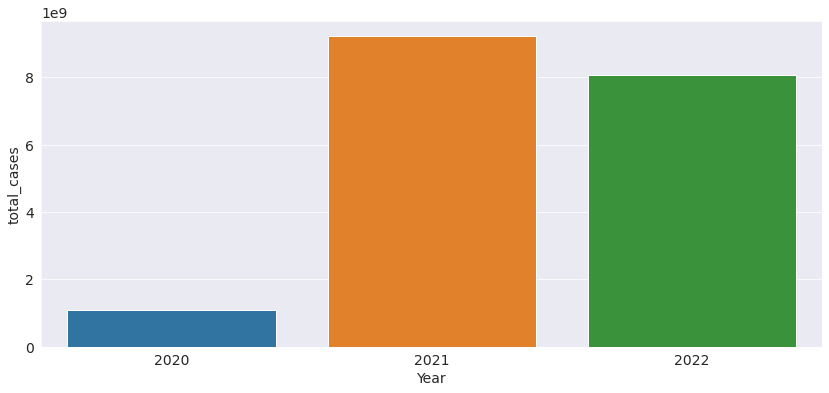

In [34]:
sns.barplot(data=year_wise,x=year_wise.index,y='total_cases')
plt.show()

#### It is clearly observed that in year 2021 most number of Covid positive cases were reported. There can be many possible reasons for this like not taking proper precautions,lack of proper knowledge about the virus, large amount of mass gatherings etc.

# 2020 Data

In [ ]:
Year_2020 = India_records[India_records.Year==2020]

In [ ]:
df=Year_2020.groupby("Month").sum().sort_values(by="total_cases")

In [ ]:
#Dropping some columns
df.drop(df.columns[[4,5,6,7,8,9]],axis=1,inplace=True)

In [ ]:
df

In [ ]:
sns.lineplot(data=df)
plt.xticks(rotation=30)
plt.show()

# 2022 Data

In [ ]:
Year_2022 = India_records[India_records.Year==2021]

In [ ]:
df2=Year_2022.groupby("Month").sum().sort_values("fully_vaccinated")

In [ ]:
df2

In [ ]:
df2.drop(df2.columns[[4,5,6,7,8,9]],axis=1,inplace=True)

In [ ]:
sns.lineplot(data=df2)
plt.xticks(rotation=30)
plt.show()

#### Many more analysis can also be performed with this dataset like vaccinated people etc. 

In [ ]:
jovian.commit()